In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [2]:
df = pd.read_csv(r'c:\Users\PC\DataAnalysis\Dataset\Taxi_fare Data\data.csv')

C:\Users\PC\AppData\Local\Temp\ipykernel_4528\1882236318.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'c:\Users\PC\DataAnalysis\Dataset\Taxi_fare Data\data.csv')


In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


Exploratory Data Analysis

In [4]:
df.shape

(6405008, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [7]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [10]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [11]:
df.isnull().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
duration                     0
dtype: int64

In [12]:
(65441/len(df))*100

1.021716132126611

In [13]:
df.dropna(inplace = True)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5,14.233333
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,19.000000
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5,16.283333
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5,9.633333


In [14]:
df['RatecodeID'] = df['RatecodeID'].astype('Int64')  
df['payment_type'] = df['payment_type'].astype('Int64')  
df['passenger_count'] = df['passenger_count'].astype('Int64') 

In [15]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   Int64
trip_distance                   float64
RatecodeID                        Int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      Int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [16]:
df_work = df[['passenger_count','duration','fare_amount','trip_distance','payment_type']]

In [17]:
print(df_work)

         passenger_count   duration  fare_amount  trip_distance  payment_type
0                      1   4.800000          6.0           1.20             1
1                      1   7.416667          7.0           1.20             1
2                      1   6.183333          6.0           0.60             1
3                      1   4.850000          5.5           0.80             1
4                      1   2.300000          3.5           0.00             2
...                  ...        ...          ...            ...           ...
6339562                1  14.233333         11.0           2.10             1
6339563                1  19.000000         13.0           2.13             1
6339564                1  16.283333         12.5           2.55             1
6339565                1   9.633333          8.5           1.61             2
6339566                1   1.066667          0.0           0.00             1

[6339567 rows x 5 columns]


In [18]:
df_work.duplicated().sum()

np.int64(3331706)

In [19]:
df_work = df_work.drop_duplicates()

In [20]:
df_work.shape

(3007861, 5)

In [21]:
print(type(df_work))


<class 'pandas.core.frame.DataFrame'>


In [22]:
df_work['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2     0.19035
3     0.06636
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: Float64

In [23]:
df_work['payment_type'].value_counts(normalize=True)

payment_type
1    0.678267
2    0.307573
3    0.008721
4    0.005438
5         0.0
Name: proportion, dtype: Float64

In [24]:
df_work = df_work[df_work['payment_type']<3]
df_work = df_work[(df_work['passenger_count']>0)& (df_work['passenger_count']<6)]

In [25]:
df_work.shape

(2780283, 5)

In [26]:
df_work['payment_type'] = df_work['payment_type'].astype('object')
df_work['payment_type'] = df_work['payment_type'].replace({1: 'card', 2: 'cash'})


In [27]:
print (df_work)

         passenger_count   duration  fare_amount  trip_distance payment_type
0                      1   4.800000          6.0           1.20         card
1                      1   7.416667          7.0           1.20         card
2                      1   6.183333          6.0           0.60         card
3                      1   4.850000          5.5           0.80         card
4                      1   2.300000          3.5           0.00         cash
...                  ...        ...          ...            ...          ...
6339555                3  14.800000         10.0           2.09         card
6339561                1  21.500000         17.5           4.11         card
6339563                1  19.000000         13.0           2.13         card
6339564                1  16.283333         12.5           2.55         card
6339566                1   1.066667          0.0           0.00         card

[2780283 rows x 5 columns]


In [28]:
df_work.describe()

,passenger_count,duration,fare_amount,trip_distance
count,2780283.0,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386,2.415478e+01,1.780567e+01,4.536729e+00
std,1.176652,9.260031e+01,1.506997e+01,4.895890e+00
min,1.0,-2.770367e+03,-5.000000e+02,-2.218000e+01
25%,1.0,9.883333e+00,9.000000e+00,1.500000e+00
50%,1.0,1.573333e+01,1.300000e+01,2.730000e+00
75%,2.0,2.336667e+01,2.100000e+01,5.470000e+00
max,5.0,8.525117e+03,4.265000e+03,2.628800e+02


In [29]:
df_work= df_work[df_work['fare_amount']>0]
df_work= df_work[df_work['trip_distance']>0]
df_work= df_work[df_work['duration']>0]

In [30]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df_work = df_work[(df_work[col]>lower_bound) & (df_work[col]<upper_bound)]


In [31]:
df_work

,passenger_count,duration,fare_amount,trip_distance,payment_type
0,1,4.800000,6.0,1.20,card
1,1,7.416667,7.0,1.20,card
2,1,6.183333,6.0,0.60,card
3,1,4.850000,5.5,0.80,card
5,1,0.883333,2.5,0.03,cash
...,...,...,...,...,...
6339550,4,12.383333,10.5,2.40,card
6339555,3,14.800000,10.0,2.09,card
6339561,1,21.500000,17.5,4.11,card
6339563,1,19.000000,13.0,2.13,card


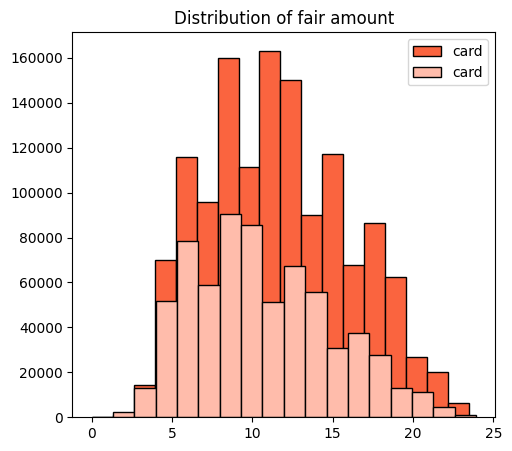

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fair amount')
plt.hist(df_work[df_work['payment_type']=='card']['fare_amount'], histtype='barstacked' ,bins=18, edgecolor= 'k', color='#FA643F', label='card')
plt.hist(df_work[df_work['payment_type']=='cash']['fare_amount'], histtype='barstacked',bins=18, edgecolor= 'k', color='#FFBCAB', label='card')
plt.legend()
plt.show()


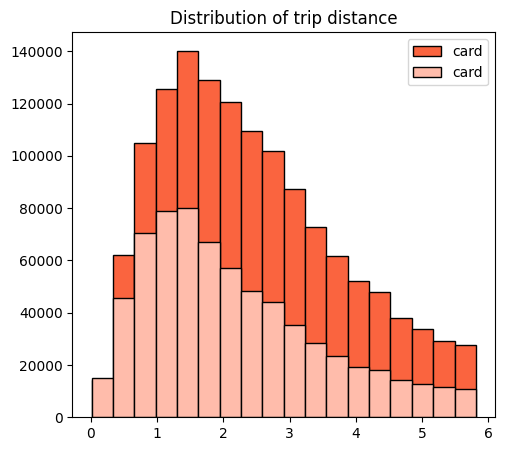

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of trip distance')
plt.hist(df_work[df_work['payment_type']=='card']['trip_distance'], histtype='barstacked' ,bins=18, edgecolor= 'k', color='#FA643F', label='card')
plt.hist(df_work[df_work['payment_type']=='cash']['trip_distance'], histtype='barstacked',bins=18, edgecolor= 'k', color='#FFBCAB', label='card')
plt.legend()
plt.show()

In [42]:
df_work.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card           11.616761  4.413146      2.441856  1.344879
cash           10.567290  4.320534      2.155883  1.321192

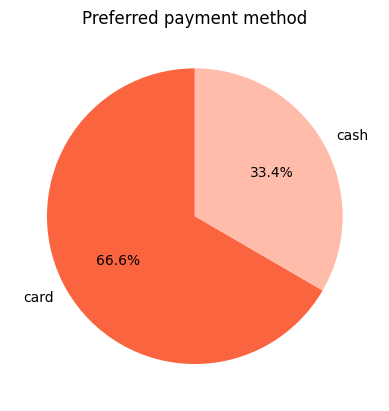

In [45]:
plt.title('Preferred payment method')
plt.pie(df_work['payment_type'].value_counts(normalize=True), labels=df_work['payment_type'].value_counts().index,
         startangle=90, autopct='%1.1f%%' , colors= ['#FA643F','#FFBCAB'])
plt.show()

In [53]:
passenger_count = df_work.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
card         1                         769371
             2                         298204
             3                         114875
             4                          60120
             5                         116062
cash         1                         409860
             2                         143992
             3                          51194
             4                          30911
             5                          44752